In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

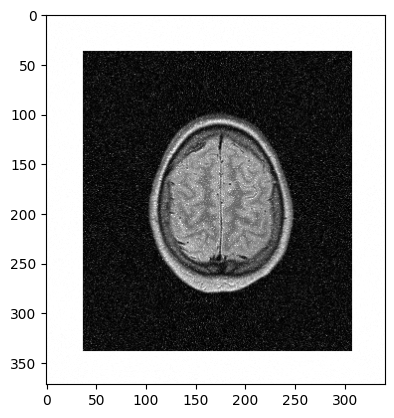

In [2]:
image = cv2.imread("MRI_Noisy.png", 0)
plt.imshow(image,cmap='gray')

In [3]:
image.shape

(372, 341)

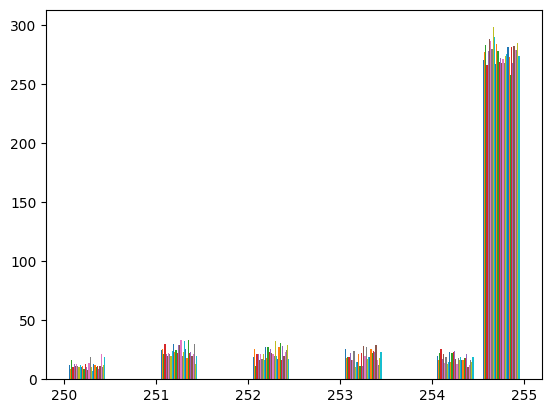

In [19]:
plt.hist(image[:,310:340])
plt.show()

### Uniform Noise

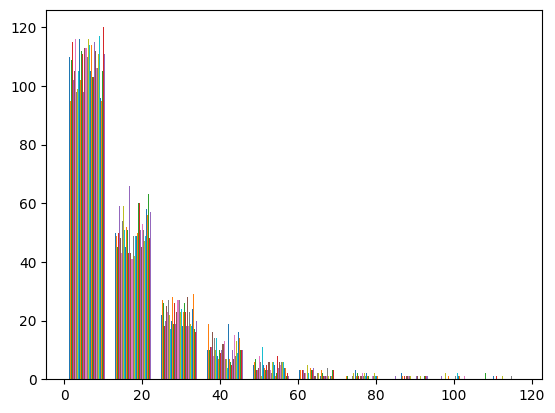

In [20]:
plt.hist(image[100:300,260:295])
plt.show()

### Uniform Noise

In [25]:
image = cv2.imread("DentalXray_Noisy.png", 0)

In [28]:
def Adaptive_Local_Noise_Reduction_Filter(image):
    (X,Y) = image.shape
    lmean = np.zeros((X,Y))
    lvar = np.zeros((X,Y))
    padded = cv2.copyMakeBorder(image, 3, 3, 3, 3, cv2.BORDER_CONSTANT,value=0)
    for i in range(X-6):
        for j in range(Y-6):
            temp = np.array(padded[i:i+7,j:j+7])
            lmean[i,j] = temp.mean()
            lvar[i,j] = temp.std()

    nvar = lvar.sum()/(X*Y)

    for i in range(X):
        for j in range(Y):
            if lvar[i,j]<nvar:
                lvar[i,j] = nvar

    newimage = np.zeros((X,Y))
    newimage = nvar/lvar
    newimage = newimage*(image-lmean)
    newimage = image - newimage
    return newimage.astype("uint8")


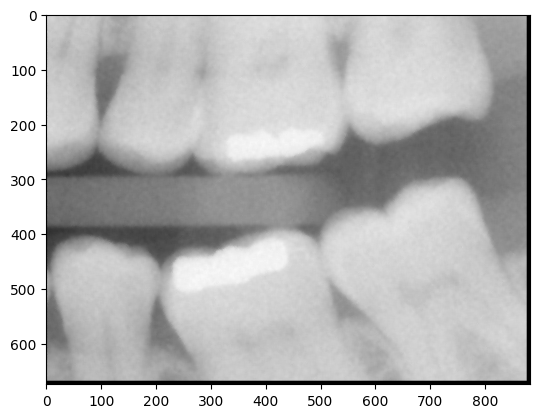

In [29]:
plt.imshow(Adaptive_Local_Noise_Reduction_Filter(image),cmap="gray")

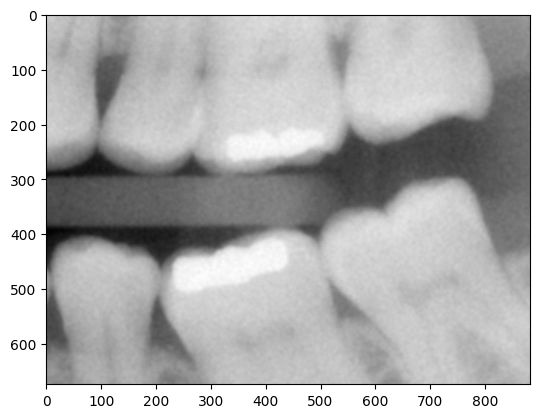

In [30]:
kernel = np.ones((7,7),np.float32)/49
ave = cv2.filter2D(image,-1,kernel)
plt.imshow(ave,cmap='gray')